<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/plotGraphMix_housesPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
df = pd.read_excel("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185826/house_price_do%CC%82%CC%81ng-da.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [72]:
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


## Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà

In [73]:
df_price = df[["price", "area", "bedroom", "toilet"]]

In [74]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    944 non-null    float64
 1   area     994 non-null    float64
 2   bedroom  635 non-null    float64
 3   toilet   551 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB


In [75]:
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [76]:
df_price.isna().sum()

price       56
area         6
bedroom    365
toilet     449
dtype: int64

In [77]:
df_price.loc[df_price['price'].isna() == True, :]

,price,area,bedroom,toilet
98,NaN,0.0,NaN,NaN
110,NaN,0.0,NaN,NaN
115,NaN,0.0,NaN,NaN
117,NaN,30.0,NaN,NaN
119,NaN,234.0,NaN,NaN
121,NaN,30.0,NaN,NaN
124,NaN,0.0,NaN,NaN
125,NaN,0.0,NaN,NaN
130,NaN,0.0,NaN,NaN
135,NaN,0.0,NaN,NaN


In [78]:
idx = list(df_price.loc[df_price['area'] == 0,:].index)

In [79]:
df_price.drop(idx, inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
df_price['price'].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [81]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    957 non-null    float64
 1   area     951 non-null    float64
 2   bedroom  635 non-null    float64
 3   toilet   551 non-null    float64
dtypes: float64(4)
memory usage: 37.4 KB


In [92]:
df_price = df_price.sort_values(by = "price")

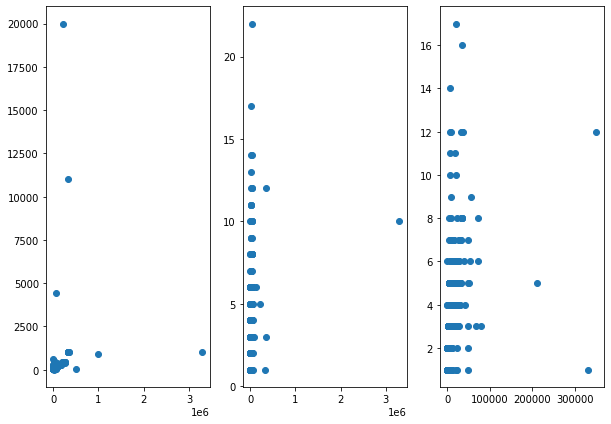

In [96]:
# making subplots objects
fig, ax = plt.subplots(1,3, figsize=(10,7))
ax[0].scatter(df_price["price"], df_price['area'])
ax[1].scatter(df_price["price"], df_price['bedroom'])
ax[2].scatter(df_price["price"], df_price['toilet'])


## So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồn thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

In [100]:
df_area = df[['price','area', 'type_of_land']]

In [101]:
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         944 non-null    float64
 1   area          994 non-null    float64
 2   type_of_land  1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [102]:
dfPriceIn1m2 = df_area.loc[df_area['area'] > 1, :]

In [103]:
dfPriceIn1m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         926 non-null    float64
 1   area          951 non-null    float64
 2   type_of_land  951 non-null    object 
dtypes: float64(2), object(1)
memory usage: 29.7+ KB


In [104]:
dfPriceIn1m2 = dfPriceIn1m2.dropna()

In [105]:
dfPriceIn1m2['type_of_land'].unique()

array(['Bán nhà riêng\n ', 'Bán nhà mặt phố\n ', 'Tập thể, cư xá',
       'Bán nhà riêng', 'Bán nhà mặt phố', 'Chung cư',
       'Bất động sản khác', 'Bất động sản khác\n ', 'Đất thổ cư'],
      dtype=object)

In [106]:
dfPriceIn1m2['type_of_land'] = dfPriceIn1m2['type_of_land'].str.replace(r'(\n)', '', regex=True).to_list()


In [107]:
dfPriceIn1m2['type_of_land'].unique()

array(['Bán nhà riêng ', 'Bán nhà mặt phố ', 'Tập thể, cư xá',
       'Bán nhà riêng', 'Bán nhà mặt phố', 'Chung cư',
       'Bất động sản khác', 'Bất động sản khác ', 'Đất thổ cư'],
      dtype=object)

In [116]:
a = dfPriceIn1m2.groupby("type_of_land")['price'].mean()

In [120]:
a.values

array([38816.22786885, 78267.36526946,  6184.96666667, 10958.59262295,
       20800.        , 23437.        ,  2011.86440678,  2094.63768116,
       10585.        ])

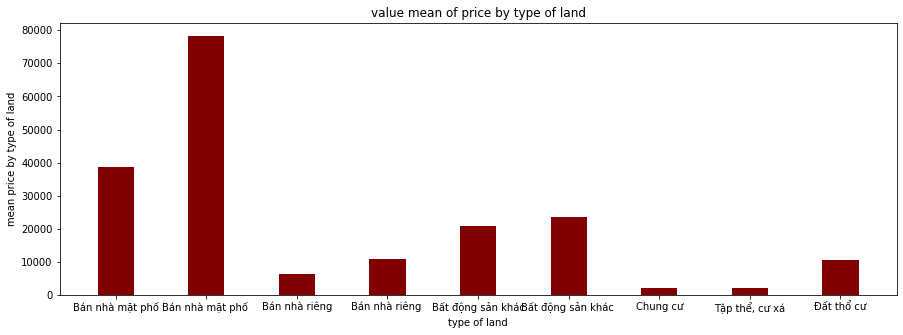

In [123]:
fig = plt.figure(figsize = (15, 5))
plt.bar(a.index, a.values, color ='maroon', width = 0.4)
 
plt.ylabel("mean price by type of land")
plt.xlabel("type of land")
plt.title("value mean of price by type of land")
plt.show()